In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as tr

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

In [3]:
sizes = opportunities.groupby("Opportunity_ID").agg({"Size":"unique"})
sizes["Total"] = sizes["Size"].apply(lambda x: len(x))
sizes = sizes[sizes["Total"] != 1]
sizes
# VEO QUE TODAS LAS OPORTUNITIES TENGAN UN SOLO SIZE

,Size,Total
Opportunity_ID,,


In [4]:
opportunities = opportunities[(opportunities["Size"]!="None")]
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
sizes = opportunities["Size"].value_counts().to_frame()
sizes = sizes.reset_index()
sizes = sizes.rename(columns={"index":"Size","Size":"Cantidad"})
sizes.sort_values(by="Cantidad",inplace=True,ascending=False)
sizes

,Size,Cantidad
0,Other,254
1,Size_3,245
2,Size_4,122
3,Size_1,11
4,Size_0,5
5,Size_2,1


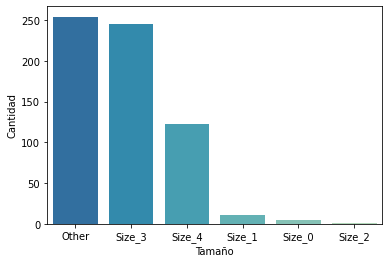

In [5]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,6)
colores = cmap(saltos)

fig1 = sns.barplot(sizes.Size, sizes["Cantidad"], palette=colores)
plt.xlabel("Tamaño")
plt.ylabel("Cantidad")
#plt.title("Cantidad de apariciones por tamaño")
plt.savefig("img/Size/CantidadSize.png")
plt.show(fig1)

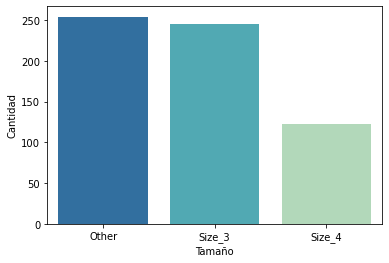

In [6]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,3)
colores = cmap(saltos)

#Borro los tamaños que tienen muy pocos datos
sizes = sizes[sizes["Cantidad"]>100]
fig1 = sns.barplot(sizes.Size, sizes["Cantidad"], palette=colores)
plt.xlabel("Tamaño")
plt.ylabel("Cantidad")
#plt.title("Cantidad de apariciones por tamaño")
plt.savefig("img/Size/CantidadSizeMasDe100.png")
plt.show(fig1)

# Veo ASP(dolar) promedio de cada size

In [7]:
#ASP(converted) es siempre USD
aspBySize = opportunities[["Size","ASP_(converted)","Opportunity_ID"]].groupby("Size").agg({"ASP_(converted)":"mean","Opportunity_ID":"count"})
aspBySize = aspBySize.reset_index()
aspBySize.rename(columns={"ASP_(converted)":"ASP(Dolar)", "Size":"Tamaño","Opportunity_ID":"Cantidad"}, inplace=True) 
aspBySize = aspBySize[aspBySize["Cantidad"]>100]
aspBySize = aspBySize.sort_values(by="ASP(Dolar)",ascending=False)
aspBySize

,Tamaño,ASP(Dolar),Cantidad
5,Size_4,0.364506,122
4,Size_3,0.356324,245
0,Other,0.344258,254


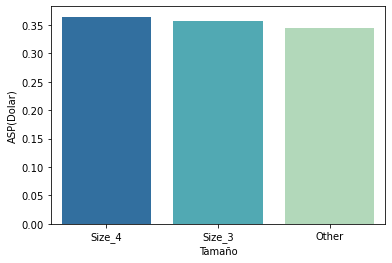

In [8]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,3)
colores = cmap(saltos)

fig1 = sns.barplot(x="Tamaño",y="ASP(Dolar)",data=aspBySize, palette=colores)
plt.xlabel("Tamaño")
plt.ylabel("ASP(Dolar)")
#plt.title("ASP por Tamaño")
plt.savefig("img/Size/ASPPorSize.png")
plt.show(fig1)
#No me dice nada esto, los precios son muy parecidos

# Size vs Stage

In [9]:
#sizesVsStage = opportunities.pivot_table(index="Size",columns="Stage",values="Opportunity_ID",aggfunc="count")
#sizesVsStage["Total"] = opportunities["Size"].value_counts()
#sizesVsStage["Closed Lost Percentage"] = sizesVsStage["Closed Lost"]/sizesVsStage["Total"]
#sizesVsStage = sizesVsStage.reset_index()
#sizesVsStage.rename(columns={"Closed Lost Percentage":"Porcentaje Closed Lost", "Size":"Tamaño"},inplace=True)
#sizesVsStage = sizesVsStage[sizesVsStage["Total"]>100]
#sizesVsStage

sizesVsStage = opportunities.groupby(["Size","Stage"]).agg({"Opportunity_ID":"count"})#Consigo la cantidad de veces de cada Stage por cada source
sizesVsStage = sizesVsStage.reset_index()
sizesVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace = True)
total = sizesVsStage.groupby("Size").agg({"Cantidad":"sum"}) #La cantidad total de veces que aparece source
sizesVsStage.set_index("Size",inplace=True)
sizesVsStage["Total"] = total["Cantidad"]
#sizesVsStage = sizesVsStage[sizesVsStage["Total"]>100]#Filtro a los q tienen mas de 100 entradas
sizesVsStage.reset_index(inplace=True)
sizesVsStage = sizesVsStage[sizesVsStage["Size"] != "None"]
sizesVsStage["Cantidad"] = sizesVsStage["Cantidad"]/sizesVsStage["Total"]
sizesVsStage

,Size,Stage,Cantidad,Total
0,Other,Closed Lost,1.0,254
1,Size_0,Closed Lost,1.0,5
2,Size_1,Closed Lost,1.0,11
3,Size_2,Closed Lost,1.0,1
4,Size_3,Closed Lost,1.0,245
5,Size_4,Closed Lost,1.0,122


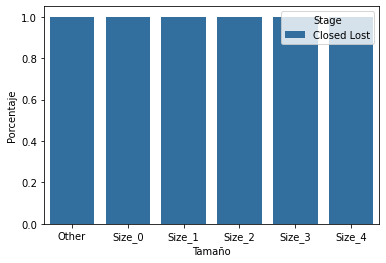

In [10]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.7,3)
colores = cmap(saltos)

fig1 = sns.barplot(x="Size",y="Cantidad",hue="Stage",data=sizesVsStage, palette=colores)
plt.xlabel("Tamaño")
plt.ylabel("Porcentaje")
#plt.title("Stage por Size")
plt.savefig("img/Size/StagePorSize.png")
plt.show(fig1)

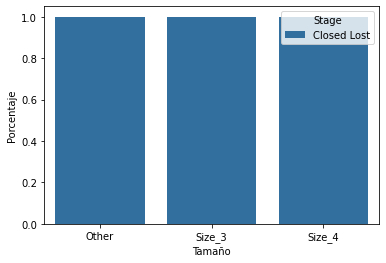

In [11]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.7,3)
colores = cmap(saltos)

sizesVsStage = sizesVsStage[sizesVsStage["Total"]>100]
fig1 = sns.barplot(x="Size",y="Cantidad",hue="Stage",data=sizesVsStage, palette=colores)
plt.xlabel("Tamaño")
plt.ylabel("Porcentaje")
#plt.title("Stage por Size")
plt.savefig("img/Size/StagePorSizeSinFiltrar.png")
plt.show(fig1)

# Size vs Product Type

In [12]:
sizeVsProductType = opportunities[["Size","Product_Type","Opportunity_ID"]].groupby(["Size","Product_Type"]).agg({"Opportunity_ID":"count"})
sizeVsProductType.reset_index(inplace=True)
totalSize = sizeVsProductType.groupby("Size").agg({"Opportunity_ID":"sum"})
sizeVsProductType.set_index("Size",inplace=True)
sizeVsProductType["Total Size"] = totalSize["Opportunity_ID"]
sizeVsProductType = sizeVsProductType[sizeVsProductType["Total Size"]>100]
sizeVsProductType.reset_index(inplace=True)
sizeVsProductType.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
sizeVsProductType["Porcentaje"] = sizeVsProductType["Cantidad"]/sizeVsProductType["Total Size"]
sizeVsProductType = sizeVsProductType[sizeVsProductType["Product_Type"] != "None"]
sizeVsProductType

,Size,Product_Type,Cantidad,Total Size,Porcentaje
1,Other,Other,226,254,0.889764
2,Other,Product_Type_0,2,254,0.007874
3,Other,Product_Type_1,6,254,0.023622
4,Other,Product_Type_2,4,254,0.015748
5,Other,Product_Type_3,10,254,0.039370
6,Other,Product_Type_4,1,254,0.003937
8,Size_3,Other,42,245,0.171429
9,Size_3,Product_Type_0,42,245,0.171429
10,Size_3,Product_Type_1,60,245,0.244898
11,Size_3,Product_Type_2,2,245,0.008163


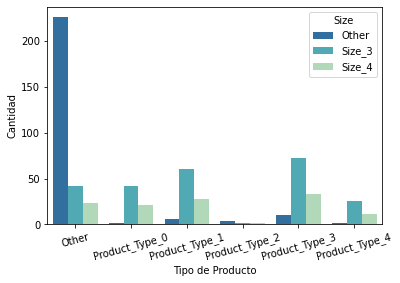

In [13]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,3)
colores = cmap(saltos)

fig1 = sns.barplot(x="Product_Type",y="Cantidad",hue="Size",data=sizeVsProductType, palette=colores)
plt.xlabel("Tipo de Producto")
plt.ylabel("Cantidad")
#plt.title("Tamaños por Tipo de Producto")
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=15)
plt.savefig("img/Size/SizeVsProductType.png",bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(fig1)

In [14]:
### QUIERO SACAR NONE Y PT2 PORQUE TIENEN POCOS DATOS
totalPT = sizeVsProductType.groupby("Product_Type").agg({"Cantidad":"sum"})
totalPT
sizeVsProductType.set_index("Product_Type",inplace=True)
sizeVsProductType["Total PT"] = totalPT["Cantidad"]
sizeVsProductType
sizeVsProductType = sizeVsProductType[sizeVsProductType["Total PT"]>50]
sizeVsProductType.reset_index(inplace=True)
sizeVsProductType

,Product_Type,Size,Cantidad,Total Size,Porcentaje,Total PT
0,Other,Other,226,254,0.889764,291
1,Product_Type_0,Other,2,254,0.007874,65
2,Product_Type_1,Other,6,254,0.023622,94
3,Product_Type_3,Other,10,254,0.039370,115
4,Other,Size_3,42,245,0.171429,291
5,Product_Type_0,Size_3,42,245,0.171429,65
6,Product_Type_1,Size_3,60,245,0.244898,94
7,Product_Type_3,Size_3,72,245,0.293878,115
8,Other,Size_4,23,122,0.188525,291
9,Product_Type_0,Size_4,21,122,0.172131,65


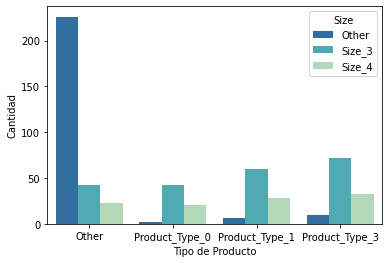

In [15]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,3)
colores = cmap(saltos)

fig1 = sns.barplot(x="Product_Type",y="Cantidad",hue="Size",data=sizeVsProductType,palette=colores)
plt.xlabel("Tipo de Producto")
plt.ylabel("Cantidad")
#plt.title("Porduct Type por Size")
#fig1.set_xticklabels(fig1.get_xticklabels(), rotation=25)
plt.savefig("img/Size/SizeVsProductTypeFiltrado.png")
plt.show(fig1)
#PUEDO VER QUE PARA CAD PRODUCT TYPE PREVALECE EL SIZE 3, SEGUIDO DEL SIZE 4 Y ALGUNOS TIENEN OTHER. LO DE OTHER - OTHER TIENE SENTIDO XQ ES GENERICO

# Size vs TRF

In [16]:
sizeVsTRF = opportunities[["Size","TRF","Opportunity_ID"]].groupby("Size").agg({"TRF":"mean","Opportunity_ID":"count"})
sizeVsTRF = sizeVsTRF[(sizeVsTRF["TRF"] > 0) & (sizeVsTRF["Opportunity_ID"]>100)]
sizeVsTRF.reset_index(inplace=True)
sizeVsTRF = sizeVsTRF.sort_values(by="TRF", ascending=False)
sizeVsTRF

,Size,TRF,Opportunity_ID
2,Size_4,14.368852,122
0,Other,4.027559,254
1,Size_3,2.032653,245


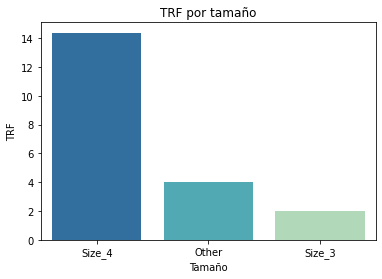

In [17]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,3)
colores = cmap(saltos)

plot = sns.barplot(x="Size",y="TRF",data=sizeVsTRF,palette=colores)
plt.xlabel("Tamaño")
plt.ylabel("TRF")
plt.title("TRF por tamaño")
plt.savefig("img/Size/TRFPorSize.png")
plt.show(plot)